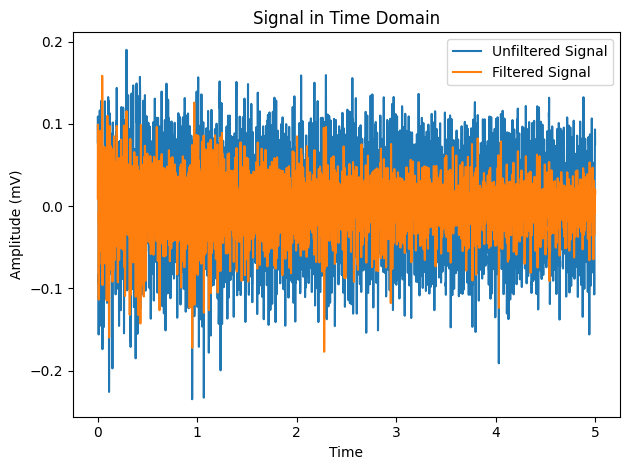

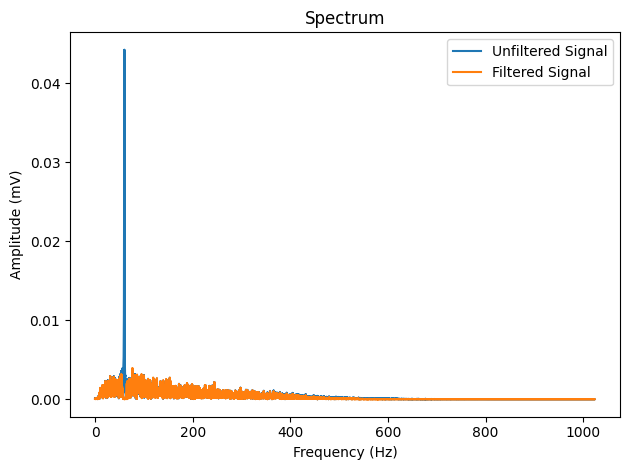

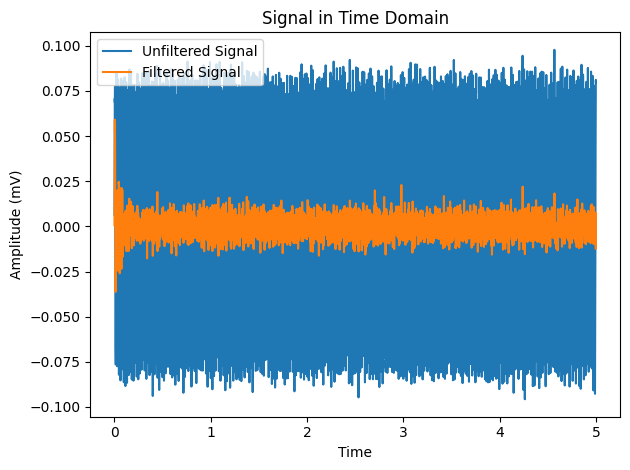

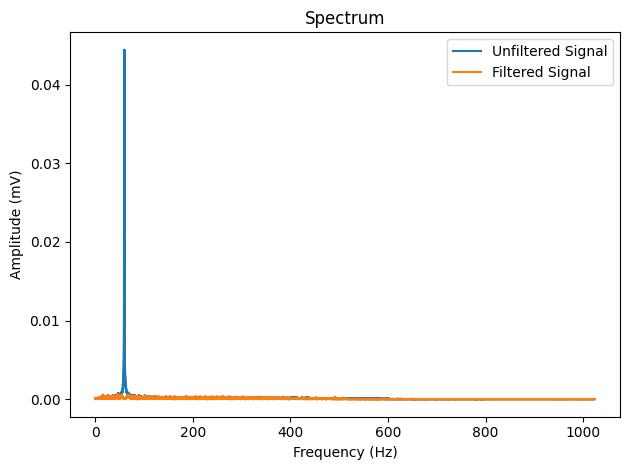

TypeError: can only concatenate str (not "numpy.float64") to str

In [8]:
# Imports
import pandas as pd
import numpy as np
import scipy

from matplotlib import pyplot as plt
from scipy import signal

# Constants
FS = 2048
ORDER = 3
F1 = 55
F2 = 65
F3 = 0.1
F4 = 450


# Functions
def filter(data):  # Function to create and apply filters to the signal
    sos_bandstop = signal.butter(ORDER, [F1, F2], btype='bandstop', fs=FS, output='sos')
    filtered_data = signal.sosfilt(sos_bandstop, data)
    sos_bandpass = signal.butter(ORDER, [F3, F4], btype='bandpass', fs=FS, output='sos')
    final_filtered_data = signal.sosfilt(sos_bandpass, filtered_data)

    return final_filtered_data


def fft(array):  # run fft
    sig_fft = scipy.fftpack.fft(array)
    sig_amp = 2 / 10240 * np.abs(sig_fft)
    sig_freq = np.abs(scipy.fftpack.fftfreq(10240, 1 / FS))
    return sig_freq, sig_amp


def plot(x1, y1):  # plot and show the data
    plt.rcParams["figure.autolayout"] = True
    plt.xlabel('Time')
    plt.ylabel('Amplitude (mV)')
    plt.title('Signal in Time Domain')
    plt.plot(x1, y1, label = 'Unfiltered Signal')
    plt.plot(x1, filter(y1), label = 'Filtered Signal')
    plt.legend()
    plt.show()
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (mV)')
    plt.title('Spectrum')
    freq, amp = fft(np.array(y1))
    plt.plot(freq, amp, label = 'Unfiltered Signal')
    filter_freq, filter_amp = fft(np.array(filter(y1)))
    plt.plot(filter_freq, filter_amp, label = 'Filtered Signal')
    plt.legend()
    plt.show()


# read file
columns = ["Time", "EMG_Relaxed", "EMG_Contracted"]
df = pd.read_csv("EMG_Datasets.csv", usecols=columns)

# run
plot(df.Time, df.EMG_Contracted)
plot(df.Time, df.EMG_Relaxed)

# RMS Values
print("RMS Values for Relaxed EMG without filtering: " + str(np.sqrt(np.mean(np.array(df.EMG_Relaxed) ** 2))))
print("RMS Values for Contracted EMG without filtering: " + str(np.sqrt(np.mean(np.array(df.EMG_Contracted) ** 2)))
print("RMS Values for Relaxed EMG with filtering: " +np.sqrt(np.mean(filter(df.EMG_Relaxed) ** 2)))
print("RMS Values for Contracted EMG with filtering: " +np.sqrt(np.mean(filter(df.EMG_Contracted) ** 2)))
